# Linear Regression Model

In [60]:
# surpress warnings

import warnings
warnings.filterwarnings('ignore')

In [61]:
# importing basic libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
# Load data
df = pd.read_csv("advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


 Basics of data

In [7]:
df.shape

(200, 4)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


#Data have all numerical values having No null values

In [13]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


### Visualizing data

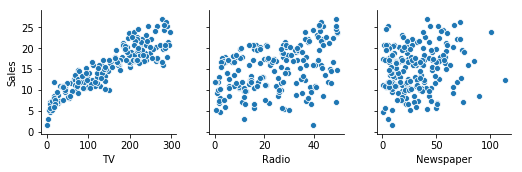

In [63]:
sns.pairplot(df, x_vars = ['TV', 'Radio', 'Newspaper'], y_vars = 'Sales', kind = 'scatter')
plt.show()

#TV is strictly following straight line and Radio and Newspaper are following but with high variance, lets confirm it by correlation matrix

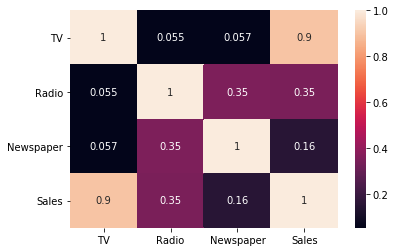

In [25]:
sns.heatmap(df.corr(),annot = True)
plt.show()

#We can also see some multicolinearity among Radio and Newspaper

## Data preparation

As we are doing simple linear regression, we will take only TV feature to predict Sales

In [64]:
X = df['TV']
y = df['Sales']

In [65]:
X.shape

(200,)

#### Train-Test split

In [96]:
# Dividing data in train and test set

# import library to split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, random_state = 103)

In [70]:
X_train.shape

(140,)

In [98]:
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

In [99]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(140, 1)
(140,)
(60, 1)
(60,)


### Building Model

In [100]:
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

# Fit the model using lm.fit()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [101]:
print(lm.intercept_)
print(lm.coef_)

6.605662675803847
[0.0579049]


The equation we get is.

$ Sales = 6.606 + 0.057* TV $

# Prediction

In [102]:
# prediction
pred = lm.predict(X_test)

In [103]:
pred.shape

(60,)

### Evaluating results

In [104]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [105]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, pred))

2.3734265632484335

In [106]:
r_squared = r2_score(y_test, pred)
r_squared

0.7794537287855585

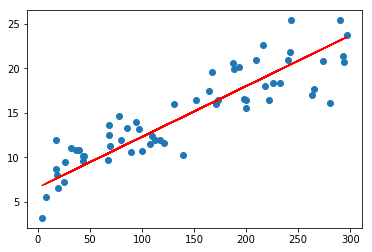

In [108]:
# Visualizing on Text set
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.606+0.057* X_test, 'r')
plt.show()

# Making pkl file for deployment

In [110]:
import pickle
# Saving model to disk
pickle.dump(lm, open('model.pkl','wb'))

In [117]:
model = pickle.load(open('model.pkl','rb'))
print(model.predict([[2]]))

[6.72147248]
